In [ ]:
!pip install se-lib --quiet
from selib import *


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.6/933.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 8.4 MB/s eta 0:00:00



==================== RESULTS ====================
  95% Confidence Intervals (1000 replications)
------------------------------------------------
Mean Battle Duration: 1.9184
    95% CI: [1.9101, 1.9266]

Mean Red Troops Remaining: 298.56
    95% CI: [291.80, 305.32]

Mean Blue Troops Remaining: 71.68
    95% CI: [66.48, 76.89]



[Text(0.5, 0, 'Blues'), Text(0, 0.5, 'Frequency')]

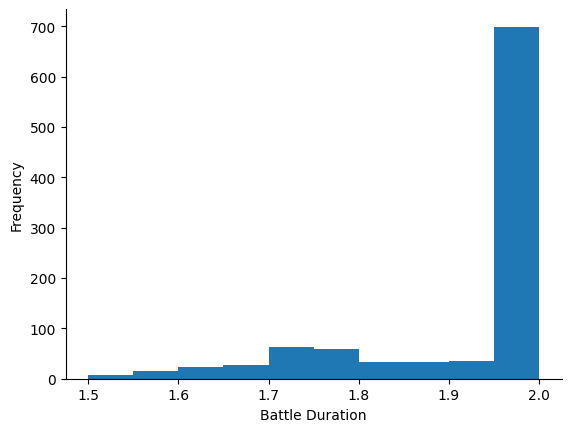

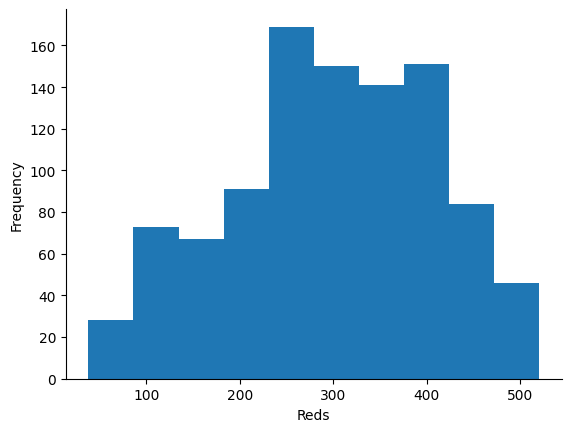

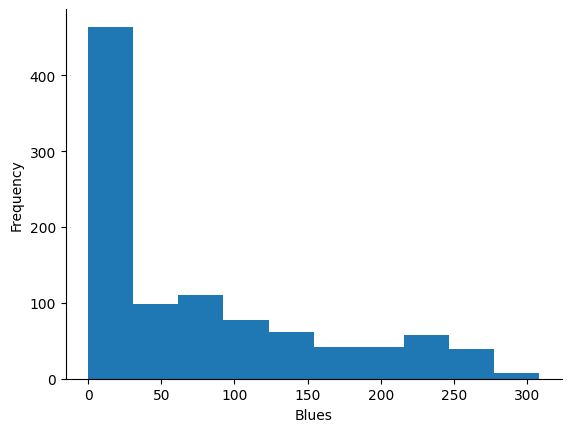

In [ ]:
# @title HW6,Q1 Battle Sim Monte Carlo & 95%CI

from selib import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
# Battle Simulator using Lanchester's Law for Aimed Fire
# initialize lists to capture run outputs
battle_durations = []
reds = []
blues = []
for run in range (1000):
# stop when either side is <=0
    init_sd_model (start =0, stop =2, dt= .05, stop_when ="red_troops <= 0 or blue_troops <= 0")
    add_stock ("blue_troops", 1000, inflows =[] , outflows =["blue_attrition"])
    add_flow ("blue_attrition", "red_troops * red_lethality")
    blue_lethality_val = np.random.uniform (.7 , .9)
    add_auxiliary ("blue_lethality", str(blue_lethality_val))
    add_stock ("red_troops", 1000, inflows =[] , outflows =["red_attrition"])
    add_flow ("red_attrition", "blue_troops * blue_lethality")
    red_lethality_val = np.random.uniform (.8 , 1.0)
    add_auxiliary ("red_lethality", str(red_lethality_val))
    output = run_model ( verbose = False )
    stop_time = get_stop_time ()
    battle_durations . append ( stop_time )
    reds . append ( max( output ["red_troops"][ stop_time ], 0))
    blues . append (max( output ["blue_troops"][ stop_time ], 0))

def confidence_interval(data, confidence=0.95):
    data = np.array(data, dtype=float)
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # sample standard deviation
    alpha = 1 - confidence
    tcrit = t.ppf(1 - alpha/2, df=n-1)
    margin = tcrit * std / np.sqrt(n)
    return mean, mean - margin, mean + margin

mean_dur, dur_low, dur_high = confidence_interval(battle_durations)
mean_red, red_low, red_high = confidence_interval(reds)
mean_blue, blue_low, blue_high = confidence_interval(blues)

print("\n==================== RESULTS ====================")
print("  95% Confidence Intervals (1000 replications)")
print("------------------------------------------------")
print(f"Mean Battle Duration: {mean_dur:.4f}")
print(f"    95% CI: [{dur_low:.4f}, {dur_high:.4f}]\n")

print(f"Mean Red Troops Remaining: {mean_red:.2f}")
print(f"    95% CI: [{red_low:.2f}, {red_high:.2f}]\n")

print(f"Mean Blue Troops Remaining: {mean_blue:.2f}")
print(f"    95% CI: [{blue_low:.2f}, {blue_high:.2f}]")
print("================================================\n")


fig , axis = plt.subplots ()
axis . hist ( battle_durations )
axis .set( xlabel = 'Battle Duration', ylabel ='Frequency')
fig , axis = plt.subplots ()
axis . hist ( reds )
axis .set( xlabel ='Reds', ylabel ='Frequency')
fig , axis = plt.subplots ()
axis . hist ( blues )
axis .set( xlabel = 'Blues', ylabel ='Frequency')

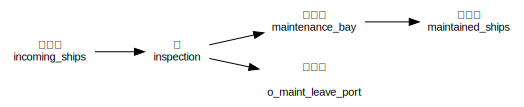

Streaming output truncated to the last 5000 lines.
7: Ship 7 leaving system at no_maint_leave_port 
7.452858858821804: Ship 5 completed using maintenance_bay resource with service time 2.4528588588218034
7.452858858821804: Ship 5 maintenance_bay -> maintained_ships
7.452858858821804: Ship 5 leaving system at maintained_ships 
8: Ship 8 entered from incoming_ships
8: Ship 8 incoming_ships -> inspection
8: Ship 8 delayed 0 at inspection
8: Ship 8 inspection -> no_maint_leave_port
8: Ship 8 leaving system at no_maint_leave_port 
8.038182929515575: Ship 6 completed using maintenance_bay resource with service time 1.064101324634916
8.038182929515575: Ship 6 maintenance_bay -> maintained_ships
8.038182929515575: Ship 6 leaving system at maintained_ships 
9: Ship 9 entered from incoming_ships
9: Ship 9 incoming_ships -> inspection
9: Ship 9 delayed 0 at inspection
9: Ship 9 inspection -> maintenance_bay
9: Ship 9 requesting maintenance_bay resource 
9: Ship 9 granted maintenance_bay resource 

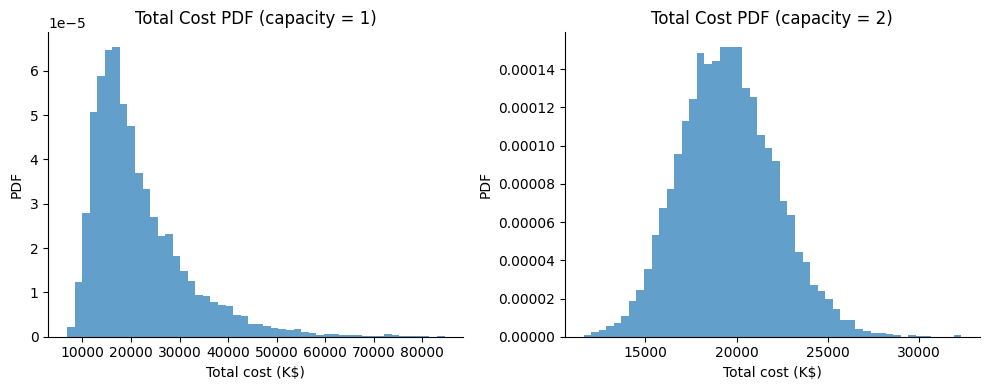

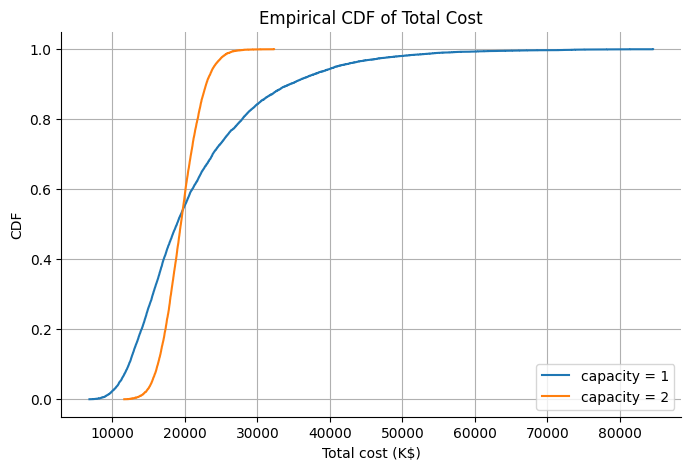


Capacity = 1
Mean total cost ≈ 21,546.9 K$
Approx. 95% CI: [21,355.0, 21,738.8] K$

Capacity = 2
Mean total cost ≈ 19,533.3 K$
Approx. 95% CI: [19,481.9, 19,584.8] K$


In [ ]:
# @title HW6,Q2: (Cap=1 & 2) Navy Cargo Ship Maint Facility
from selib import *
import numpy as np
import matplotlib.pyplot as plt

# Define the run_single_sim function to encapsulate the simulation logic
def run_single_sim(capacity, draw_diagram=False):
    init_de_model()
    add_source('incoming_ships',
              entity_name="Ship",
              num_entities = 20,
              connections={'inspection': 1},
              interarrival_time = '1')
    add_delay(name='inspection',
             delay_time = '0',
             connections = {'maintenance_bay':.5,'no_maint_leave_port':.5})
    add_server(name='maintenance_bay',
             connections={'maintained_ships': 1.0},
             service_time='np.random.uniform(.5, 3)',
             capacity = capacity)
    # It seems 'zero_maintenance_ships' was not used in the previous traceback.
    # Using the existing terminate nodes from the original problem description:
    add_terminate ('no_maint_leave_port')
    add_terminate ('maintained_ships')

    # Draw diagram only if requested
    if draw_diagram:
        draw_model_diagram (filename ='cargo_ship_model_diagram', format ='svg')

    cargo_ship_model_data, entity_data = run_model()

    waiting_times = cargo_ship_model_data ['maintenance_bay']['waiting_times']
    service_times = cargo_ship_model_data ['maintenance_bay']['service_times']

    # Handle cases where waiting_times or service_times might be empty
    waiting_days = sum(waiting_times) if waiting_times else 0
    service_days = sum(service_times) if service_times else 0

    # The original notebook's code had 'using 20 days of operations for facility cost'
    # for capacity=2, but used 'sim_end_time' for capacity=1.
    # To make it consistent and meaningful, I'll use sim_end_time for facility_cost.
    last_times = []
    for eid, edata in entity_data.items():
        # Ensure 'nodes' and its last element exist before accessing
        if 'nodes' in edata and edata['nodes']:
            last_times.append(edata['nodes'][-1][1])
    sim_end_time = max(last_times) if last_times else 0

    facility_cost = sim_end_time * 250 * capacity
    opportunity_cost = 500 * ( service_days + waiting_days )
    total_cost = facility_cost + opportunity_cost

    return {"cargo_ship_model_data": cargo_ship_model_data,
            "entity_data": entity_data,
            "waiting_days": waiting_days,
            "service_days": service_days,
            "facility_cost": facility_cost,
            "opportunity_cost": opportunity_cost,
            "total_cost": total_cost,
            "sim_end_time": sim_end_time}


if __name__ == "__main__":
    # Single-run sanity check (capacity=1)
    test_result = run_single_sim(capacity=1, draw_diagram=True)
    cargo_ship_model_data = test_result["cargo_ship_model_data"]

    print("\n==================== Single-run sanity check (capacity=1) ====================")
    print("Waiting times:", cargo_ship_model_data['maintenance_bay']['waiting_times'])
    print("Service times:", cargo_ship_model_data['maintenance_bay']['service_times'])
    print("Resource utilization:", cargo_ship_model_data['maintenance_bay']['resource_utilization'])
    print(f"Simulation end time (days): {test_result['sim_end_time']:.3f}")
    print(f"Facility cost (K$): {test_result['facility_cost']:.1f}")
    print(f"Opportunity cost (K$): {test_result['opportunity_cost']:.1f}")
    print(f"Total cost (K$): {test_result['total_cost']:.1f}")
    print("================================================================================\n")

    capacities = [1, 2]
    # Define NUM_RUNS for Monte Carlo simulations
    NUM_RUNS = 10000  # Adjust as needed for computational time vs. accuracy

    total_costs = {c: [] for c in capacities}

    for c in capacities:
        print(f"Running Monte Carlo for capacity = {c} with {NUM_RUNS} runs...")
        for i in range(NUM_RUNS):
            res = run_single_sim(capacity=c, draw_diagram=False)
            total_costs[c].append(res["total_cost"])

    costs_c1 = np.array(total_costs[1])
    costs_c2 = np.array(total_costs[2])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(costs_c1, bins=50, density=True, alpha=0.7)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 1)')

    plt.subplot(1, 2, 2)
    plt.hist(costs_c2, bins=50, density=True, alpha=0.7)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 2)')

    plt.tight_layout()
    plt.show()

    def empirical_cdf(data):
            """Return sorted data and empirical CDF values."""
            x = np.sort(data)
            n = len(x)
            y = np.arange(1, n + 1) / n
            return x, y

    x1, F1 = empirical_cdf(costs_c1)
    x2, F2 = empirical_cdf(costs_c2)

    plt.figure(figsize=(8, 5))
    plt.step(x1, F1, where='post', label='capacity = 1')
    plt.step(x2, F2, where='post', label='capacity = 2')
    plt.xlabel('Total cost (K$)')
    plt.ylabel('CDF')
    plt.title('Empirical CDF of Total Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

    def summarize_costs(data):
            mean = np.mean(data)
            std = np.std(data, ddof=1) # sample standard deviation
            n = len(data)
            # Use t-distribution for small n or when std is sample std, but for large N, Z-score (1.96) is common approximation.
            # For 1000 runs, 1.96 for 95% CI is generally acceptable.
            margin = 1.96 * std / np.sqrt(n)
            return mean, mean - margin, mean + margin

    for c in capacities:
            mean, lo, hi = summarize_costs(total_costs[c])
            print(f"\nCapacity = {c}")
            print(f"Mean total cost \u2248 {mean:,.1f} K$")
            print(f"Approx. 95% CI: [{lo:,.1f}, {hi:,.1f}] K$")

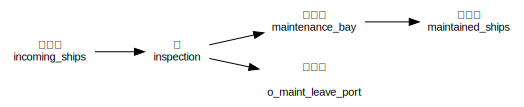

Streaming output truncated to the last 5000 lines.
3.7359156226657677: Ship 1 completed using maintenance_bay resource with service time 2.7359156226657677
3.7359156226657677: Ship 1 maintenance_bay -> maintained_ships
3.7359156226657677: Ship 1 leaving system at maintained_ships 
4: Ship 4 entered from incoming_ships
4: Ship 4 incoming_ships -> inspection
4: Ship 4 delayed 0 at inspection
4: Ship 4 inspection -> maintenance_bay
4: Ship 4 requesting maintenance_bay resource 
4: Ship 4 granted maintenance_bay resource waiting time 0
4.938583547013845: Ship 4 completed using maintenance_bay resource with service time 0.9385835470138453
4.938583547013845: Ship 4 maintenance_bay -> maintained_ships
4.938583547013845: Ship 4 leaving system at maintained_ships 
5: Ship 5 entered from incoming_ships
5: Ship 5 incoming_ships -> inspection
5: Ship 5 delayed 0 at inspection
5: Ship 5 inspection -> no_maint_leave_port
5: Ship 5 leaving system at no_maint_leave_port 
6: Ship 6 entered from incomin

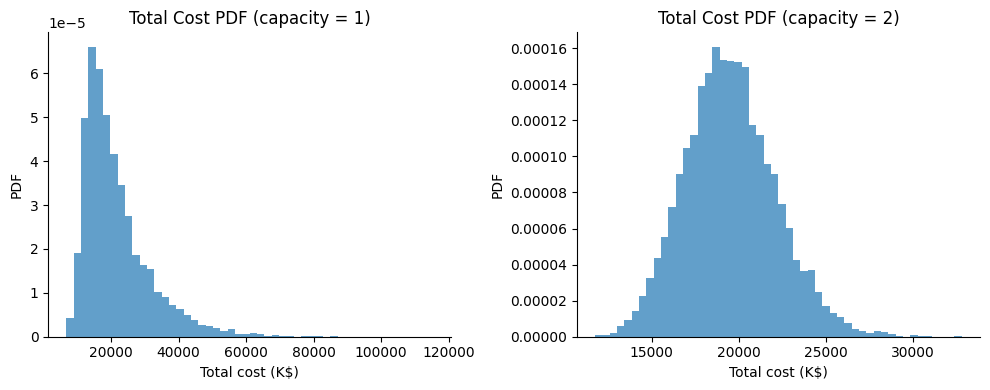


=== 90% Z-Confidence Interval for μ1 − μ2 (single − double capacity) ===
Mean total cost (capacity 1): 21,619.76 K$
Mean total cost (capacity 2): 19,514.38 K$
Estimated difference diff_hat = μ1 − μ2 = 2,105.38 K$
Standard error of difference = 104.08 K$
90% CI for (μ1 − μ2): [1,934.19, 2,276.57] K$

=== 90% Z-Test for H0: μ1 − μ2 = 0 ===
Z statistic = 20.229
p-value = 0.0000
Critical region: reject H0 if |Z| > 1.645
Decision: REJECT H0 at 90% confidence.
Interpretation: There IS a statistically significant difference between the mean total costs.


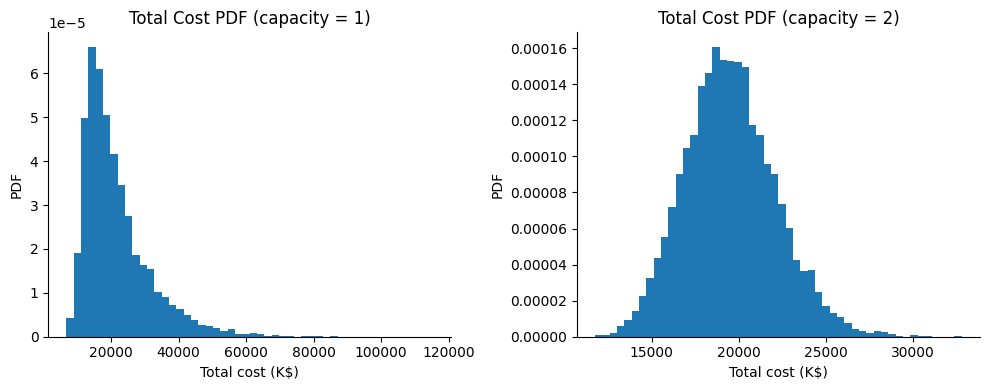

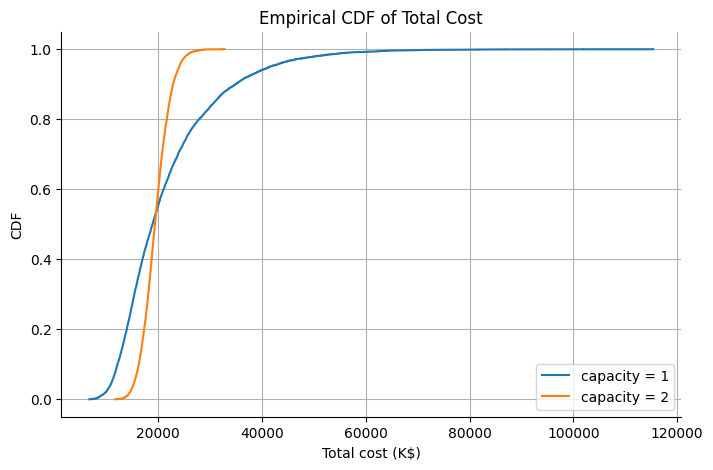

In [ ]:
# @title HW6,Q2B: (Cap=1 & 2) Hypothesis test
from selib import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the run_single_sim function to encapsulate the simulation logic
def run_single_sim(capacity, draw_diagram=False):
    init_de_model()
    add_source('incoming_ships',
              entity_name="Ship",
              num_entities = 20, # Corrected from NUM_SHIPS to 20 as in Q2A
              connections={'inspection': 1},
              interarrival_time = '1')
    add_delay(name='inspection',
             delay_time = '0',
             connections = {'maintenance_bay':.5,'no_maint_leave_port':.5})
    add_server(name='maintenance_bay',
             connections={'maintained_ships': 1.0},
             service_time='np.random.uniform(.5, 3)',
             capacity = capacity)

    add_terminate ('no_maint_leave_port')
    add_terminate ('maintained_ships')

    # Draw diagram only if requested
    if draw_diagram:
        draw_model_diagram (filename ='cargo_ship_model_diagram', format ='svg')

    cargo_ship_model_data, entity_data = run_model()

    waiting_times = cargo_ship_model_data ['maintenance_bay']['waiting_times']
    service_times = cargo_ship_model_data ['maintenance_bay']['service_times']

    # Handle cases where waiting_times or service_times might be empty
    waiting_days = sum(waiting_times) if waiting_times else 0
    service_days = sum(service_times) if service_times else 0

    last_times = []
    for eid, edata in entity_data.items():
        # Ensure 'nodes' and its last element exist before accessing
        if 'nodes' in edata and edata['nodes']:
            last_times.append(edata['nodes'][-1][1])
    sim_end_time = max(last_times) if last_times else 0

    # Facility cost calculation based on sim_end_time for consistency with Q2A
    facility_cost = sim_end_time * 250 * capacity
    opportunity_cost = 500 * ( service_days + waiting_days )
    total_cost = facility_cost + opportunity_cost

    return {"waiting_days": waiting_days,
            "service_days": service_days,
            "facility_cost": facility_cost,
            "opportunity_cost": opportunity_cost,
            "total_cost": total_cost}

if __name__ == "__main__":
    # Single-run sanity check (capacity=1)
    test_res = run_single_sim(capacity=1, draw_diagram=True) # Changed test_result to test_res
    print("Single-run sanity check (capacity = 1):")
    print(f"  waiting_days = {test_res['waiting_days']:.3f}")
    print(f"  service_days = {test_res['service_days']:.3f}")
    print(f"  facility_cost = {test_res['facility_cost']:.1f} K$")
    print(f"  opportunity_cost = {test_res['opportunity_cost']:.1f} K$")
    print(f"  total_cost = {test_res['total_cost']:.1f} K$\n")

    capacities = [1, 2]
    # Define NUM_RUNS for Monte Carlo simulations
    NUM_RUNS = 10000  # Adjust as needed for computational time vs. accuracy

    total_costs = {c: [] for c in capacities}

    for c in capacities:
        print(f"Running Monte Carlo for capacity = {c} with {NUM_RUNS} runs...")
        for i in range(NUM_RUNS):
            res = run_single_sim(capacity=c, draw_diagram=False)
            total_costs[c].append(res["total_cost"])

    costs_c1 = np.array(total_costs[1])
    costs_c2 = np.array(total_costs[2])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(costs_c1, bins=50, density=True, alpha=0.7)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 1)')

    plt.subplot(1, 2, 2)
    plt.hist(costs_c2, bins=50, density=True, alpha=0.7)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 2)')

    plt.tight_layout()
    plt.show()

    n1 = len(costs_c1)
    n2 = len(costs_c2)

    mean1 = np.mean(costs_c1)
    mean2 = np.mean(costs_c2)

    var1 = np.var(costs_c1, ddof=1)
    var2 = np.var(costs_c2, ddof=1)

    diff_hat = mean1 - mean2
    se_diff = np.sqrt(var1 / n1 + var2 / n2)
    alpha = 0.10
    z_crit = norm.ppf(1 - alpha/2)  # ~ 1.645 for 90% CI

    ci_low = diff_hat - z_crit * se_diff
    ci_high = diff_hat + z_crit * se_diff

    print("\n=== 90% Z-Confidence Interval for μ1 − μ2 (single − double capacity) ===")
    print(f"Mean total cost (capacity 1): {mean1:,.2f} K$")
    print(f"Mean total cost (capacity 2): {mean2:,.2f} K$")
    print(f"Estimated difference diff_hat = μ1 − μ2 = {diff_hat:,.2f} K$")
    print(f"Standard error of difference = {se_diff:,.2f} K$")
    print(f"90% CI for (μ1 − μ2): [{ci_low:,.2f}, {ci_high:,.2f}] K$")

    z_stat = diff_hat / se_diff
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))  # two-sided

    print("\n=== 90% Z-Test for H0: μ1 − μ2 = 0 ===")
    print(f"Z statistic = {z_stat:.3f}")
    print(f"p-value = {p_value:.4f}")
    print(f"Critical region: reject H0 if |Z| > {z_crit:.3f}")

    if abs(z_stat) > z_crit:
        print("Decision: REJECT H0 at 90% confidence.")
        print("Interpretation: There IS a statistically significant difference between the mean total costs.")
    else:
        print("Decision: FAIL TO REJECT H0 at 90% confidence.")
        print("Interpretation: There is NOT enough evidence to say the mean total costs differ.")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(costs_c1, bins=50, density=True)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 1)')

    plt.subplot(1, 2, 2)
    plt.hist(costs_c2, bins=50, density=True)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 2)')

    plt.tight_layout()
    plt.show()

    def empirical_cdf(data):
                x = np.sort(data)
                n = len(x)
                y = np.arange(1, n + 1) / n
                return x, y

    x1, F1 = empirical_cdf(costs_c1)
    x2, F2 = empirical_cdf(costs_c2)

    plt.figure(figsize=(8, 5))
    plt.step(x1, F1, where='post', label='capacity = 1')
    plt.step(x2, F2, where='post', label='capacity = 2')
    plt.xlabel('Total cost (K$)')
    plt.ylabel('CDF')
    plt.title('Empirical CDF of Total Cost')
    plt.legend()
    plt.grid(True)
    plt.show()


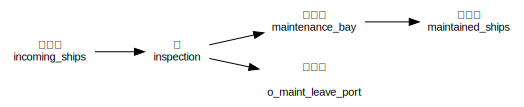

Streaming output truncated to the last 5000 lines.
1.0207233616605644: Ship 3 delayed 0 at inspection
1.0207233616605644: Ship 3 inspection -> no_maint_leave_port
1.0207233616605644: Ship 3 leaving system at no_maint_leave_port 
1.3469893620196376: Ship 4 entered from incoming_ships
1.3469893620196376: Ship 4 incoming_ships -> inspection
1.3469893620196376: Ship 4 delayed 0 at inspection
1.3469893620196376: Ship 4 inspection -> no_maint_leave_port
1.3469893620196376: Ship 4 leaving system at no_maint_leave_port 
1.5481443069503422: Ship 5 entered from incoming_ships
1.5481443069503422: Ship 5 incoming_ships -> inspection
1.5481443069503422: Ship 5 delayed 0 at inspection
1.5481443069503422: Ship 5 inspection -> no_maint_leave_port
1.5481443069503422: Ship 5 leaving system at no_maint_leave_port 
1.7023378906393771: Ship 6 entered from incoming_ships
1.7023378906393771: Ship 6 incoming_ships -> inspection
1.7023378906393771: Ship 6 delayed 0 at inspection
1.7023378906393771: Ship 6 insp

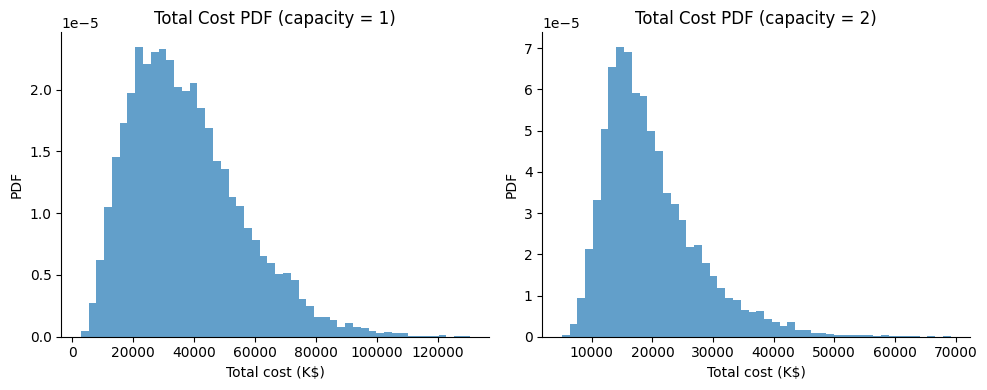


=== 90% Z-Confidence Interval for μ1 − μ2 (single − double capacity) ===
Mean total cost (capacity 1): 37,510.30 K$
Mean total cost (capacity 2): 19,767.71 K$
Estimated difference diff_hat = μ1 − μ2 = 17,742.59 K$
Standard error of difference = 200.21 K$
90% CI for (μ1 − μ2): [17,413.28, 18,071.90] K$

=== 90% Z-Test for H0: μ1 − μ2 = 0 ===
Z statistic = 88.622
p-value = 0.0000
Critical region: reject H0 if |Z| > 1.645
Decision: REJECT H0 at 90% confidence.
Interpretation: There IS a statistically significant difference between the mean total costs.


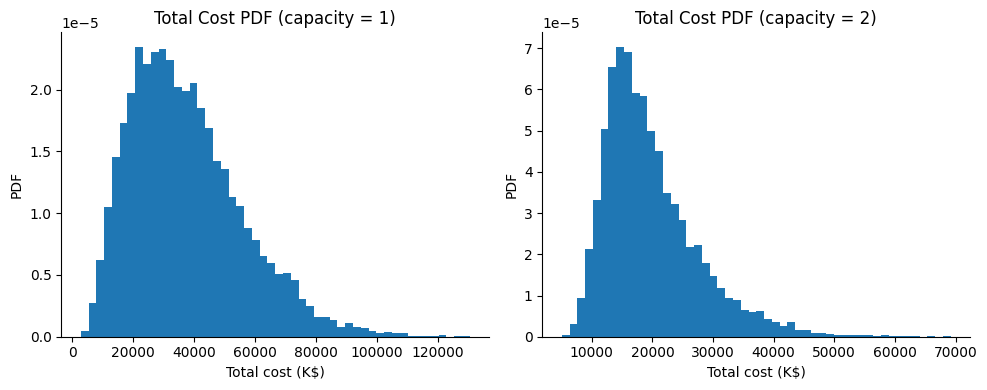

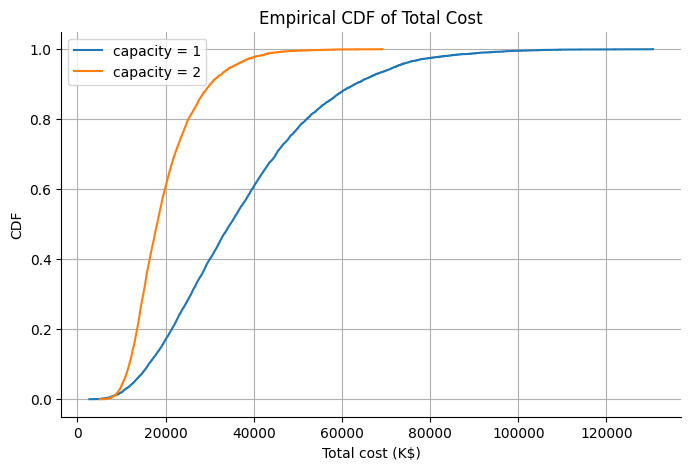

In [ ]:
# @title HW6,Q2c: (Cap=1 & 2) Exp distributed interarrivals
from selib import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the run_single_sim function to encapsulate the simulation logic
def run_single_sim(capacity, draw_diagram=False):
    init_de_model()
    add_source('incoming_ships',
              entity_name="Ship",
              num_entities = 20, # Corrected from NUM_SHIPS to 20 as in Q2A
              connections={'inspection': 1},
              interarrival_time = 'np.random.exponential(10/24)')
    add_delay(name='inspection',
             delay_time = '0',
             connections = {'maintenance_bay':.5,'no_maint_leave_port':.5})
    add_server(name='maintenance_bay',
             connections={'maintained_ships': 1.0},
             service_time='np.random.uniform(.5, 3)',
             capacity = capacity)

    add_terminate ('no_maint_leave_port')
    add_terminate ('maintained_ships')

    # Draw diagram only if requested
    if draw_diagram:
        draw_model_diagram (filename ='cargo_ship_model_diagram', format ='svg')

    cargo_ship_model_data, entity_data = run_model()

    waiting_times = cargo_ship_model_data ['maintenance_bay']['waiting_times']
    service_times = cargo_ship_model_data ['maintenance_bay']['service_times']

    # Handle cases where waiting_times or service_times might be empty
    waiting_days = sum(waiting_times) if waiting_times else 0
    service_days = sum(service_times) if service_times else 0

    last_times = []
    for eid, edata in entity_data.items():
        # Ensure 'nodes' and its last element exist before accessing
        if 'nodes' in edata and edata['nodes']:
            last_times.append(edata['nodes'][-1][1])
    sim_end_time = max(last_times) if last_times else 0

    # Facility cost calculation based on sim_end_time for consistency with Q2A
    facility_cost = sim_end_time * 250 * capacity
    opportunity_cost = 500 * ( service_days + waiting_days )
    total_cost = facility_cost + opportunity_cost

    return {"waiting_days": waiting_days,
            "service_days": service_days,
            "facility_cost": facility_cost,
            "opportunity_cost": opportunity_cost,
            "total_cost": total_cost}

if __name__ == "__main__":
    # Single-run sanity check (capacity=1)
    test_res = run_single_sim(capacity=1, draw_diagram=True) # Changed test_result to test_res
    print("Single-run sanity check (capacity = 1):")
    print(f"  waiting_days = {test_res['waiting_days']:.3f}")
    print(f"  service_days = {test_res['service_days']:.3f}")
    print(f"  facility_cost = {test_res['facility_cost']:.1f} K$")
    print(f"  opportunity_cost = {test_res['opportunity_cost']:.1f} K$")
    print(f"  total_cost = {test_res['total_cost']:.1f} K$\n")

    capacities = [1, 2]
    # Define NUM_RUNS for Monte Carlo simulations
    NUM_RUNS = 10000  # Adjust as needed for computational time vs. accuracy

    total_costs = {c: [] for c in capacities}

    for c in capacities:
        print(f"Running Monte Carlo for capacity = {c} with {NUM_RUNS} runs...")
        for i in range(NUM_RUNS):
            res = run_single_sim(capacity=c, draw_diagram=False)
            total_costs[c].append(res["total_cost"])

    costs_c1 = np.array(total_costs[1])
    costs_c2 = np.array(total_costs[2])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(costs_c1, bins=50, density=True, alpha=0.7)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 1)')

    plt.subplot(1, 2, 2)
    plt.hist(costs_c2, bins=50, density=True, alpha=0.7)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 2)')

    plt.tight_layout()
    plt.show()

    n1 = len(costs_c1)
    n2 = len(costs_c2)

    mean1 = np.mean(costs_c1)
    mean2 = np.mean(costs_c2)

    var1 = np.var(costs_c1, ddof=1)
    var2 = np.var(costs_c2, ddof=1)

    diff_hat = mean1 - mean2
    se_diff = np.sqrt(var1 / n1 + var2 / n2)
    alpha = 0.10
    z_crit = norm.ppf(1 - alpha/2)  # ~ 1.645 for 90% CI

    ci_low = diff_hat - z_crit * se_diff
    ci_high = diff_hat + z_crit * se_diff

    print("\n=== 90% Z-Confidence Interval for μ1 − μ2 (single − double capacity) ===")
    print(f"Mean total cost (capacity 1): {mean1:,.2f} K$")
    print(f"Mean total cost (capacity 2): {mean2:,.2f} K$")
    print(f"Estimated difference diff_hat = μ1 − μ2 = {diff_hat:,.2f} K$")
    print(f"Standard error of difference = {se_diff:,.2f} K$")
    print(f"90% CI for (μ1 − μ2): [{ci_low:,.2f}, {ci_high:,.2f}] K$")

    z_stat = diff_hat / se_diff
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))  # two-sided

    print("\n=== 90% Z-Test for H0: μ1 − μ2 = 0 ===")
    print(f"Z statistic = {z_stat:.3f}")
    print(f"p-value = {p_value:.4f}")
    print(f"Critical region: reject H0 if |Z| > {z_crit:.3f}")

    if abs(z_stat) > z_crit:
        print("Decision: REJECT H0 at 90% confidence.")
        print("Interpretation: There IS a statistically significant difference between the mean total costs.")
    else:
        print("Decision: FAIL TO REJECT H0 at 90% confidence.")
        print("Interpretation: There is NOT enough evidence to say the mean total costs differ.")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(costs_c1, bins=50, density=True)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 1)')

    plt.subplot(1, 2, 2)
    plt.hist(costs_c2, bins=50, density=True)
    plt.xlabel('Total cost (K$)')
    plt.ylabel('PDF')
    plt.title('Total Cost PDF (capacity = 2)')

    plt.tight_layout()
    plt.show()

    def empirical_cdf(data):
                x = np.sort(data)
                n = len(x)
                y = np.arange(1, n + 1) / n
                return x, y

    x1, F1 = empirical_cdf(costs_c1)
    x2, F2 = empirical_cdf(costs_c2)

    plt.figure(figsize=(8, 5))
    plt.step(x1, F1, where='post', label='capacity = 1')
    plt.step(x2, F2, where='post', label='capacity = 2')
    plt.xlabel('Total cost (K$)')
    plt.ylabel('CDF')
    plt.title('Empirical CDF of Total Cost')
    plt.legend()
    plt.grid(True)
    plt.show()
